# Iterative DFS

The recursive approach for DFS is trival. Interviewers may ask you to implement iterative approach. Note that the recursive approach uses a stack under the hood.

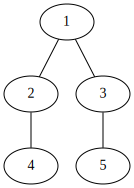

In [3]:
#we'll be using some packages to visualize the trees
import os, sys

#add parent directory
sys.path.append(os.path.dirname(os.getcwd()))

from graph import TreeNode, visualize_tree

def build_dfs_tree():
    # Create the nodes
    root = TreeNode(val=1)
    root.left = TreeNode(val=2)
    root.left.left = TreeNode(val=4)
    root.right = TreeNode(val=3)
    root.right.right = TreeNode(val=5)
    return root

tree_root=build_dfs_tree()
visualize_tree(tree_root)

## Inorder

1. First visit the left child (and all elems in its subtree)
2. Visit current node
3. Then visit right child (and all elems in its subtree)

We declare a pointer `curr` which points to the current node we are visiting. 
- Once `curr` points at a node, keep adding the left child until we reach the leftmost nodes
  - We add these nodes to the stack since we want to visit them and their right child later.

- If `cur` is actually `None`, pop from the stack, visit that node, and then visit the right child of that node. 
  - The stack will ensure we traverse the parent and right nodes in the correct order.
  - if we visit the left child and it is `None`, pop will ensure we visit its parent first then right
  - if we visit the right child and it is `None`, 
    - at this point we have already popped its parent
    - we then go back to this right child's parent's parent

Interestingly enough, since we do left then parent then right, then operations always go "from left to right"

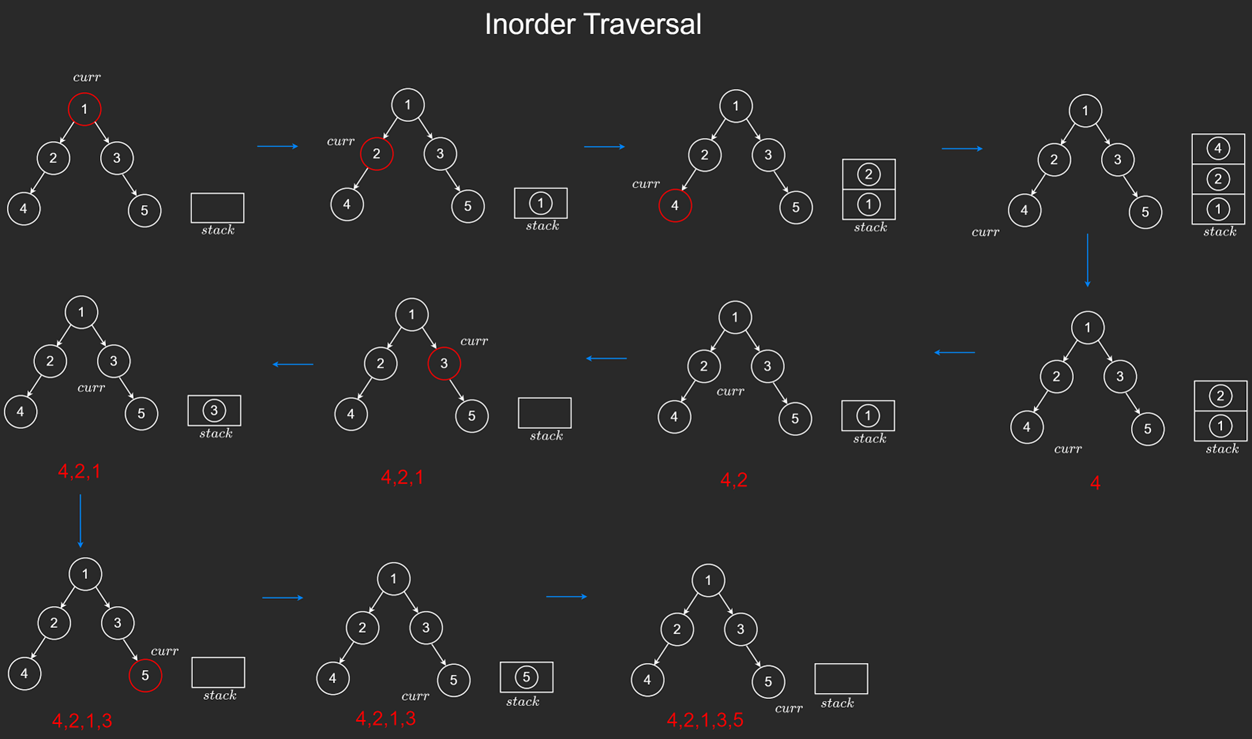

> If there's no red circle, means `curr` is `None`

In [4]:
def inorder(root):

    stack = []
    current = root

    #finish traversing only when BOTH stack is empty AND current is None
    while stack or current:
        # Traverse to the leftmost node
        while current:
            #save for later to do visit this node and its right child
            stack.append(current)
            current = current.left

        #we have reached past the leftmost node here.

        # Process the most recent node
        current = stack.pop()
        print(current.val)

        # Move to the right child
        current = current.right

        #restart the process of going left

inorder(tree_root)

4
2
1
3
5


## Preorder

1. Visit current node
2. Visit left node (and all elems in its subtree)
3. Visit right node (and all elems in its subtree)

At every iteration, we simply pop the top element and visit it. Then, append the *right node first and then the left node*. This ensures we visit the left node first then the right node. Last-In-First-Out principle of stack.

The tricky bit is to check for whether left or right children exists before adding it!

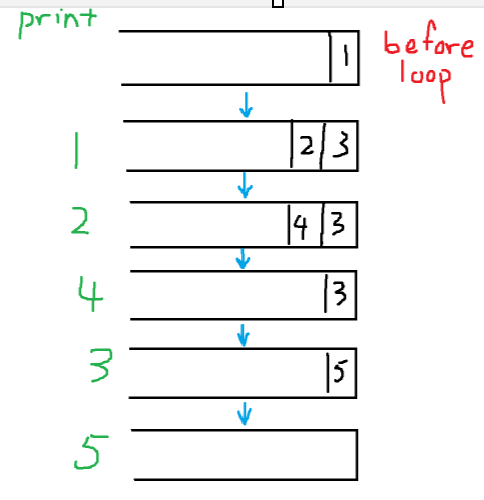

In [8]:
def preorder(root):

  stack = [root]

  while stack:
    node = stack.pop()
    if node:
      #this is the operation in question
      print(node.val)
      stack.append(node.right)
      stack.append(node.left)

    #images above show what happen here

preorder(tree_root)

1
2
4
3
5


## PostOrder

In postOrder, we first traverse the left subtree, then the right subtree, then the node itself.

We will use 2 stacks, a `visit` stack and a corrsponding `stack`. These will always be of the same size and have corresponding elements. `stack` will be used to store the nodes we are currently processing, while `visit` will be used to keep track of whether we've previously visited that node or not.

Every iteration we pop the top elemnent. If we've visited it before, that means we've done its left and right children, so we can do our operation on it. If we've never visited it before, mark it as have visited and then add the right and left children respectively.

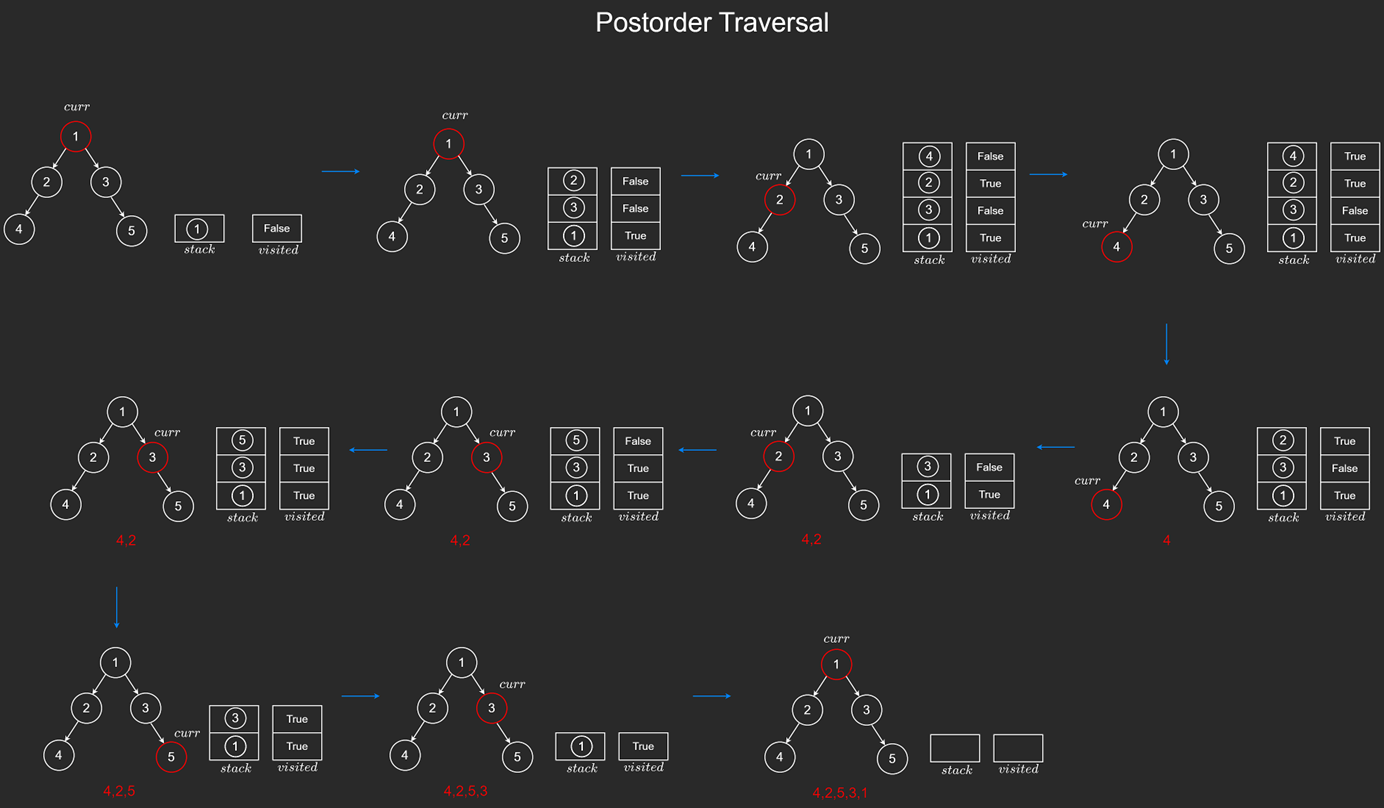

In [ ]:
def postorder(root):
    stack = [root]
    visit = [False]
    #as long as still has elems
    while stack:
        #check the top pair
        curr, visited = stack.pop(), visit.pop()

        #here, we're allowed to add in None values as it will be added and popped
        if curr:
            if visited:
                print(curr.val)
            else:
                #put itself back, we have visited it before
                #this is for the final visiting to print it
                stack.append(curr)
                visit.append(True)

                #put the right child, havent visit before
                stack.append(curr.right)
                visit.append(False)

                #put the left child, havent visit before
                stack.append(curr.left)
                visit.append(False)

# Usage
postorder(tree_root)

## Complexity

If $n$ is the number of nodes and $h$ is the height of our tree, the time complexity is $O(n)$ and space complexity is $O(h)$

---

## Problem: Binary Search Tree Iterator

Implement the `BSTIterator` class that represents an iterator over the **in-order traversal** of a binary search tree (BST):

- BSTIterator(TreeNode root) Initializes an object of the BSTIterator class. The root of the BST is given as part of the constructor. The pointer should be initialized to a non-existent number smaller than any element in the BST.
- boolean hasNext() Returns true if there exists a number in the traversal to the right of the pointer, otherwise returns false.
- int next() Moves the pointer to the right, then returns the number at the pointer.

Notice that by initializing the pointer to a non-existent smallest number, the first call to next() will return the smallest element in the BST.

You may assume that next() calls will always be valid. That is, there will be at least a next number in the in-order traversal when next() is called.

*Note that starting from min elem here will mean BST will print the elems in ascending order*

In [ ]:
#this solution is really neat!
class BSTIterator:
    # @param root, a binary search tree's root node
    def __init__(self, root):
        self.stack = list()
        self.pushAll(root)

    # @return a boolean, whether we have a next smallest number
    def hasNext(self):
        return self.stack

    # @return an integer, the NEXT SMALLEST NUMBER
    # pop one element and process its right child as the new root
    def next(self):
        tmpNode = self.stack.pop()
        #all the left-way nodes of this right child
        self.pushAll(tmpNode.right)
        return tmpNode.val
    
    #keep going left and add all these nodes to the stack
    def pushAll(self, node):
        while node is not None:
            self.stack.append(node)
            node = node.left